In [74]:
#!pip install fglib
%matplotlib inline

A simple example of the sum-product algorithm
This is a simple example of the sum-product algorithm on a factor graph
with Bernoulli random variables, which is taken from page 409 of the book
C. M. Bishop, Pattern Recognition and Machine Learning. Springer, 2006.
      /--\      +----+      /--\      +----+      /--\
     | x1 |-----| fa |-----| x2 |-----| fb |-----| x3 |
      \--/      +----+      \--/      +----+      \--/
                             |
                           +----+
                           | fc |
                           +----+
                             |
                            /--\
                           | x4 |
                            \--/
The following joint distributions are used for the factor nodes.
     fa   | x2=0 x2=1     fb   | x3=0 x3=1     fc   | x4=0 x4=1
     ----------------     ----------------     ----------------
     x1=0 | 0.3  0.4      x2=0 | 0.3  0.4      x2=0 | 0.3  0.4
     x1=1 | 0.3  0.0      x2=1 | 0.3  0.0      x2=1 | 0.3  0.0

In [75]:
from fglib import graphs, nodes, inference, rv

# Create factor graph
fg = graphs.FactorGraph()

# Create variable nodes
x1 = nodes.VNode("x1", rv.Discrete)
x2 = nodes.VNode("x2", rv.Discrete)
x3 = nodes.VNode("x3", rv.Discrete)
x4 = nodes.VNode("x4", rv.Discrete)

# Create factor nodes (with joint distributions)
dist_fa = [[3, 4],
           [3, 1.0]]
fa = nodes.FNode("fa", rv.Discrete(dist_fa, x1, x2))

dist_fb = [[5, 6],
           [1, 0]]
fb = nodes.FNode("fb", rv.Discrete(dist_fb, x2, x3))

dist_fc = [[3, 4],
           [5, 0]]
fc = nodes.FNode("fc", rv.Discrete(dist_fc, x2, x4))

# Add nodes to factor graph
fg.set_nodes([x1, x2, x3, x4])
fg.set_nodes([fa, fb, fc])

# Add edges to factor graph
fg.set_edge(x1, fa)
fg.set_edge(fa, x2)
fg.set_edge(x2, fb)
fg.set_edge(fb, x3)
fg.set_edge(x2, fc)
fg.set_edge(fc, x4)

# Perform sum-product algorithm on factor graph
# and request belief of variable node x4
belief = inference.sum_product(fg, x4)

# Print belief of variables
print("Belief of variable node x4:")
print(belief)

print("Belief of variable node x3:")
print(x3.belief())

print("Belief of variable node x2:")
print(x2.belief(normalize=True))

print("Unnormalized belief of variable node x1:")
print(x1.belief(normalize=False))

print("Unnormalized belief of variable node X1:")
print(x1.belief(normalize=True))

Belief of variable node x4:
[0.45790554 0.54209446]
Belief of variable node x3:
[0.4825462 0.5174538]
Belief of variable node x2:
[0.9486653 0.0513347]
Unnormalized belief of variable node x1:
[251. 236.]
Unnormalized belief of variable node X1:
[0.51540041 0.48459959]


In [76]:
# Perform max-product algorithm on factor graph
# and request maximum of variable node x4
tup = inference.max_product(fg, x4)
maximum = tup[0]
# Print maximum of variables
print("Maximum of variable node x4:")
print(maximum)

print("Maximum of variable node x3:")
print(x3.maximum())

print("Maximum of variable node x2:")
print(x2.maximum(normalize=True))

print("Unnormalized Maximum of variable node x1:")
print(x1.maximum(normalize=False))

print(tup[1])

Maximum of variable node x4:
0.5714285714285714
Maximum of variable node x3:
0.5454545454545454
Maximum of variable node x2:
0.782608695652174
Unnormalized Maximum of variable node x1:
72.0
{<fglib.nodes.VNode object at 0x000001C3EAA45748>: 0, <fglib.nodes.VNode object at 0x000001C3EAA45BE0>: 0, <fglib.nodes.VNode object at 0x000001C3EAA45710>: 0, <fglib.nodes.VNode object at 0x000001C3EAA459B0>: 0}


In [77]:
g = fg.get_vnodes()[0]
g.belief().pmf

array([0.5, 0.5])

In [140]:
#second example 
#assignment

# Create factor graph
fg = graphs.FactorGraph()

# Create variable nodes
a = nodes.VNode("a", rv.Discrete)
b = nodes.VNode("b", rv.Discrete)
c = nodes.VNode("c", rv.Discrete)
d = nodes.VNode("d", rv.Discrete)

# Create factor nodes (with joint distributions)
dist_fab = [[100, 5],
           [10, 60]]
fab = nodes.FNode("fab", rv.Discrete(dist_fab, a, b))

dist_fbc = [[10, 5],
           [2, 15]]
fbc = nodes.FNode("fbc", rv.Discrete(dist_fbc, b, c))

dist_fcd = [[10, 8],
           [6, 10]]
fcd = nodes.FNode("fcd", rv.Discrete(dist_fcd, c, d))

# Add nodes to factor graph
fg.set_nodes([a, b, c, d])
fg.set_nodes([fab, fbc, fcd])

# Add edges to factor graph
fg.set_edge(a, fab)
fg.set_edge(fab, b)
fg.set_edge(b, fbc)
fg.set_edge(fbc, c)
fg.set_edge(c, fcd)
fg.set_edge(fcd, d)


# Perform sum-product algorithm on factor graph
# and request belief of variable node x4
belief = inference.sum_product(fg, b)


# Print belief of variables
print("Belief of variable node x4:")
print(belief)

print("Belief of variable node x3:")
print(b.belief(normalize=False))

print("Belief of variable node x2:")
print(c.belief(normalize=False))

print("Unnormalized belief of variable node x1:")
print(d.belief(normalize=False))

print("Unnormalized belief of variable node X1:")
print(a.belief(normalize=False))

Belief of variable node x4:
[0.61452514 0.38547486]
Belief of variable node x3:
[28600. 17940.]
Belief of variable node x2:
[22140. 24400.]
Unnormalized belief of variable node x1:
[21450. 25090.]
Unnormalized belief of variable node X1:
[27380. 19160.]


In [79]:
fnodes = fg.get_fnodes()

In [80]:
f = fnodes[0]

In [81]:
f.spa(a).pmf

array([27380., 19160.])

In [82]:
import networkx as nx
from matplotlib import pyplot as plt

In [83]:
def drawgraph(G,pos=None):
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    if pos == None:
        pos = nx.spring_layout(G,scale=10)
    v_nodes = G.get_vnodes();
    f_nodes = G.get_fnodes();
    
    
    for node in G.adjacency():
        vertices = []
        for edge in node[1]:
            vertices.append(tuple(pos[node[0]]))
            vertices.append(tuple(pos[edge]))
            x,y = zip(*vertices)
            plt.plot(x,y,'r-',linewidth=2)
    for node in v_nodes:
        ax.annotate(node,xy=(pos[node][0],pos[node][1]+.45))
        plt.scatter(pos[node][0],pos[node][1],marker='o',s=800,facecolors='r',edgecolors='r')
    for node in f_nodes:
        print(node)
        ax.annotate(node,xy=(pos[node][0],pos[node][1]+.45))
        plt.scatter(pos[node][0],pos[node][1],marker='s',s=500,facecolors='r')
    plt.show()
    

In [128]:
def drawgraphWithMessage(G,pos=None, chosen_node=None, flow_direction=None, backward=False, messages=None):
        
    if pos == None:
        pos = nx.spring_layout(G,scale=10)
    if chosen_node is None:  # pick random node
        chosen_node = choice(G.get_vnodes())

    
    
    fig = plt.figure(figsize=(20,10))
    
 
    ax = fig.add_subplot(111)
    
    
    if pos == None:
        pos = nx.spring_layout(G,scale=10)
    v_nodes = G.get_vnodes();
    f_nodes = G.get_fnodes();
    
    #drawing the message flow direction
    if flow_direction != None:
        for (v,u) in flow_direction:

            if backward == True:
                u,v = v,u
            x1,y1 = pos[u]
            x2,y2 = pos[v]
            #drawing direction from 1/3rd of line to 2/3rd of line
            ax.annotate('',xy=((1*x1+3*x2)/4,(1*y1+3*y2)/4),xytext=((3*x1+1*x2)/4,(3*y1+1*y2)/4),
                        arrowprops=dict(facecolor='blue', edgecolor='red'))
    if messages != None:
        for(u,v,msg) in messages:
            x1,y1 = pos[u]
            x2,y2 = pos[v]
            ax.annotate(msg,xy=((x1+x2)/2,(y1+y2)/2),
                        xytext=((x1+x2)/2-1,(y1+y2)/2+1),
                        arrowprops=dict(arrowstyle="->"))
            
    
    for node in G.adjacency():
        vertices = []
        for edge in node[1]:
            vertices.append(tuple(pos[node[0]]))
            vertices.append(tuple(pos[edge]))
            x,y = zip(*vertices)
            plt.plot(x,y,'r-',linewidth=2)
    for node in v_nodes:
        ax.annotate(node,xy=(pos[node][0],pos[node][1]+.45))
        plt.scatter(pos[node][0],pos[node][1],marker='o',s=800,facecolors='r',edgecolors='r')
    for node in f_nodes:
        ax.annotate(node,xy=(pos[node][0],pos[node][1]+.45))
        plt.scatter(pos[node][0],pos[node][1],marker='s',s=500,facecolors='r')
    
    plt.scatter(pos[chosen_node][0],pos[chosen_node][1],s=1500,facecolors='none',edgecolors='r')
    
    plt.show()
    

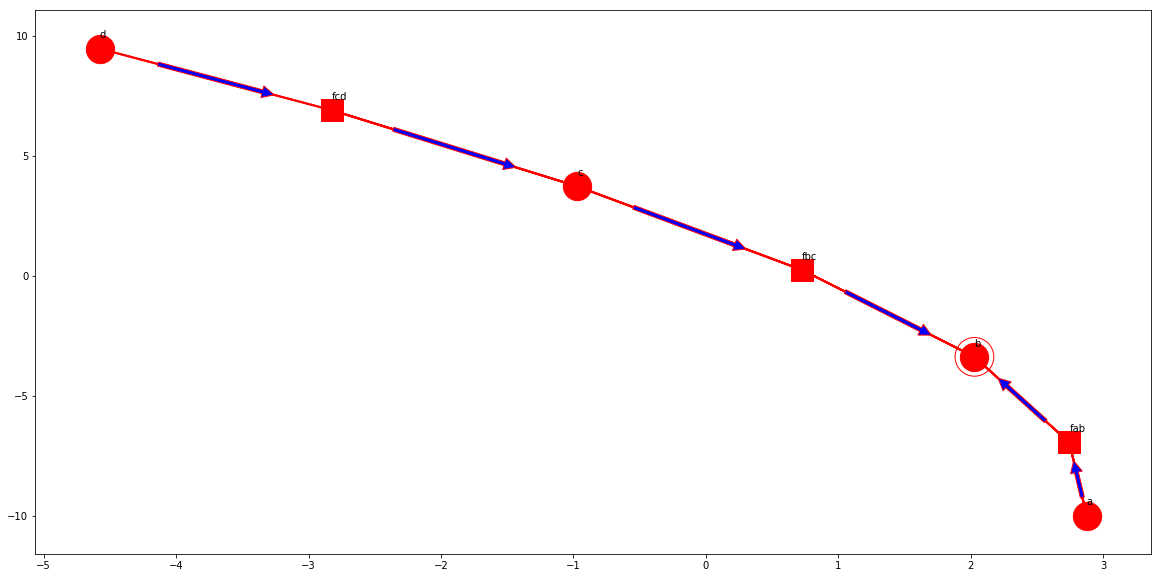

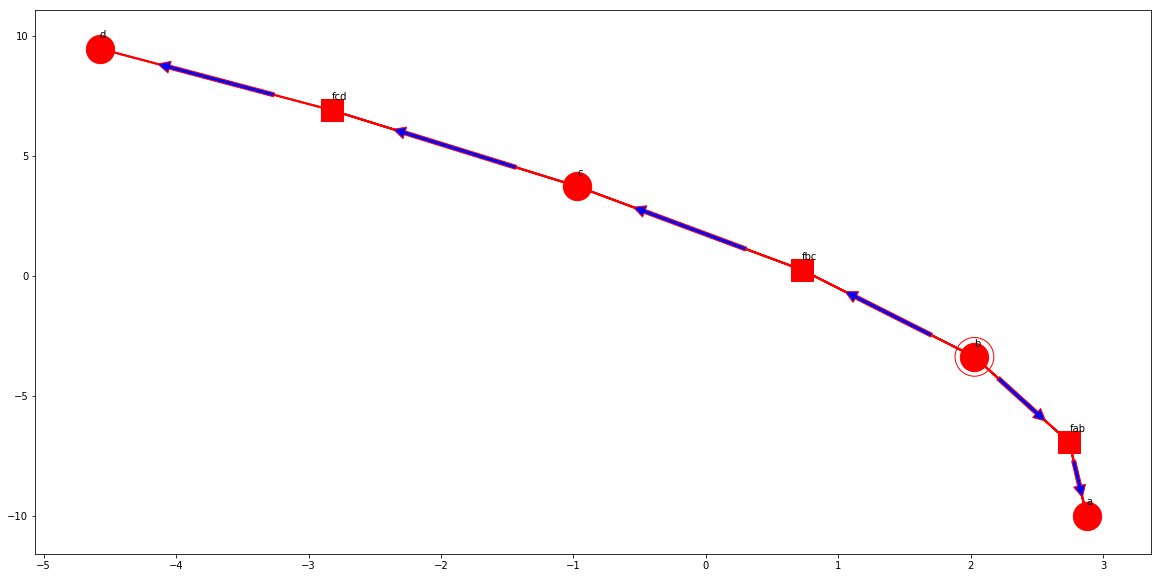

In [95]:
pos = nx.spring_layout(fg,scale=10)
dfs = list(nx.dfs_edges(fg, b))
drawgraphWithMessage(fg,pos=pos,chosen_node=b,flow_direction=dfs)
drawgraphWithMessage(fg,pos=pos,chosen_node=b,flow_direction=dfs,backward=True)

In [133]:
from random import choice

import networkx as nx

from . import nodes
def belief_propagation(graph, query_node=None):
    """Belief propagation.
    Perform exact inference on tree structured graphs.
    Return the belief of all query_nodes.
    """

    if query_node is None:  # pick random node
        query_node = choice(graph.get_vnodes())

    # Depth First Search to determine edges
    dfs = nx.dfs_edges(graph, query_node)

    # Convert tuple to reversed list
    backward_path = list(dfs)
    forward_path = reversed(backward_path)
    
    print('the chosen node')
    print(query_node)
    print()
    print('forward')
    # Messages in forward phase
    pos = nx.spring_layout(graph,scale=10)
    messages = []
    for (v, u) in forward_path:  # Edge direction: u -> v
        print(u,v)
        msg = u.spa(v)
        print(msg) 
        messages.append((u,v,msg))
        print()
        graph[u][v]['object'].set_message(u, v, msg)
        print(messages)
        #drawgraph(graph,pos=pos)
        drawgraphWithMessage(graph,pos=pos,chosen_node=query_node, flow_direction=backward_path,messages=messages)
        

    print('backward')
    # Messages in backward phase
    messages = []
    for (u, v) in backward_path:  # Edge direction: u -> v
        msg = u.spa(v)
        print(u,v)
        print(msg)
        messages.append((u,v,msg))
        print()
        graph[u][v]['object'].set_message(u, v, msg)
        drawgraphWithMessage(graph,pos=pos,chosen_node=query_node, 
                             flow_direction=backward_path,backward=True,messages=messages)

    # Return marginal distribution
    return query_node.belief()


the chosen node
a

forward
d fcd
[[1.]
 [1.]]

[(<fglib.nodes.VNode object at 0x000001C3EBB364A8>, <fglib.nodes.FNode object at 0x000001C3EBB36198>, <fglib.rv.Discrete object at 0x000001C3EBB367F0>)]


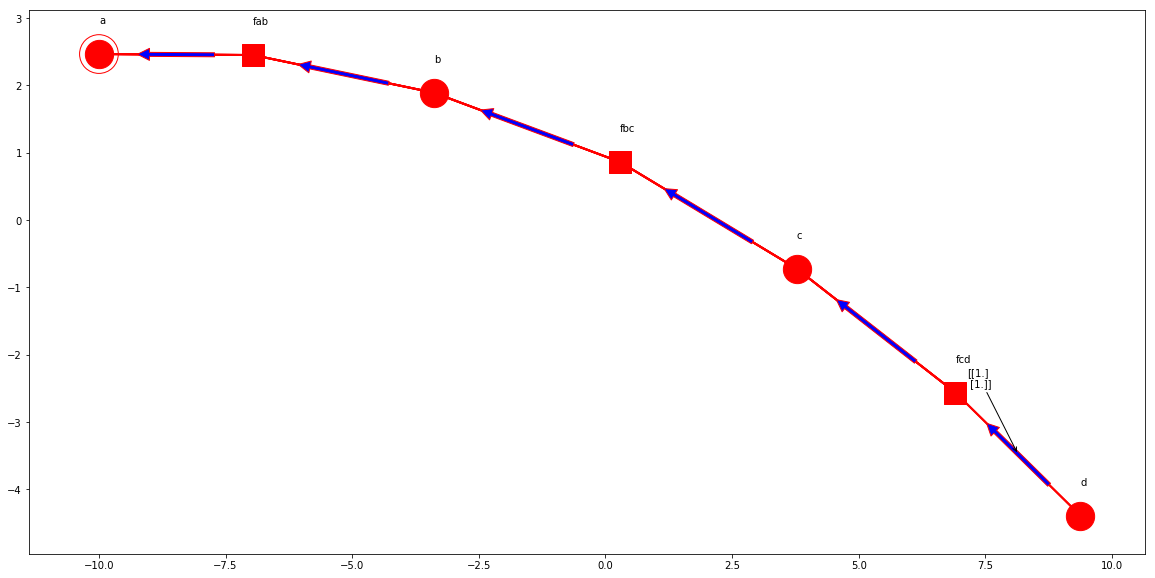

fcd c
[18. 16.]

[(<fglib.nodes.VNode object at 0x000001C3EBB364A8>, <fglib.nodes.FNode object at 0x000001C3EBB36198>, <fglib.rv.Discrete object at 0x000001C3EBB367F0>), (<fglib.nodes.FNode object at 0x000001C3EBB36198>, <fglib.nodes.VNode object at 0x000001C3EBB36EB8>, <fglib.rv.Discrete object at 0x000001C3EB76EF98>)]


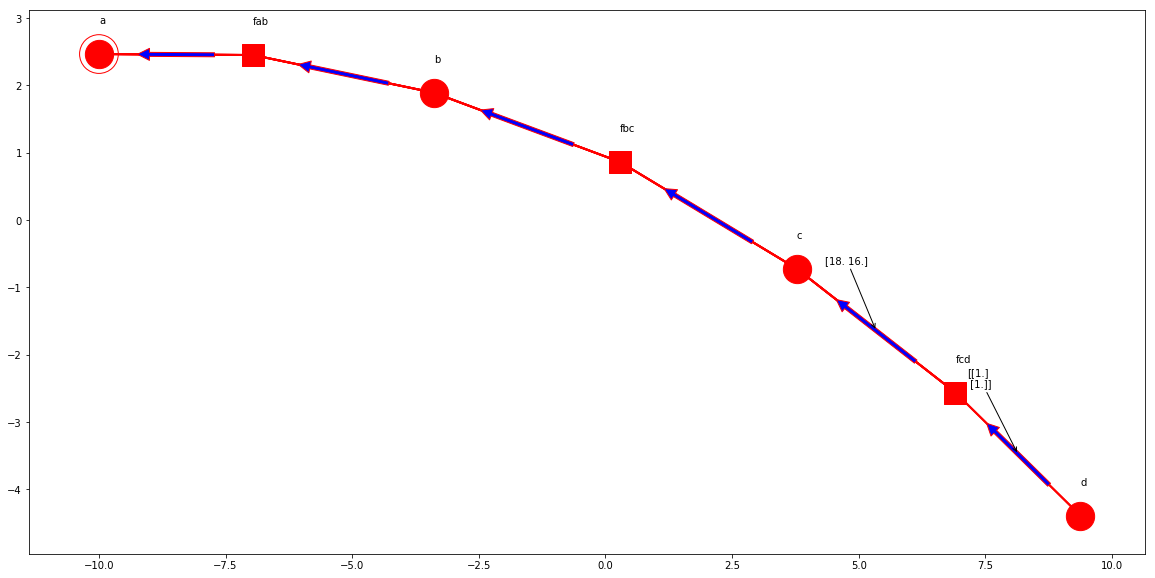

c fbc
[18. 16.]

[(<fglib.nodes.VNode object at 0x000001C3EBB364A8>, <fglib.nodes.FNode object at 0x000001C3EBB36198>, <fglib.rv.Discrete object at 0x000001C3EBB367F0>), (<fglib.nodes.FNode object at 0x000001C3EBB36198>, <fglib.nodes.VNode object at 0x000001C3EBB36EB8>, <fglib.rv.Discrete object at 0x000001C3EB76EF98>), (<fglib.nodes.VNode object at 0x000001C3EBB36EB8>, <fglib.nodes.FNode object at 0x000001C3EBB360F0>, <fglib.rv.Discrete object at 0x000001C3EB25DDD8>)]


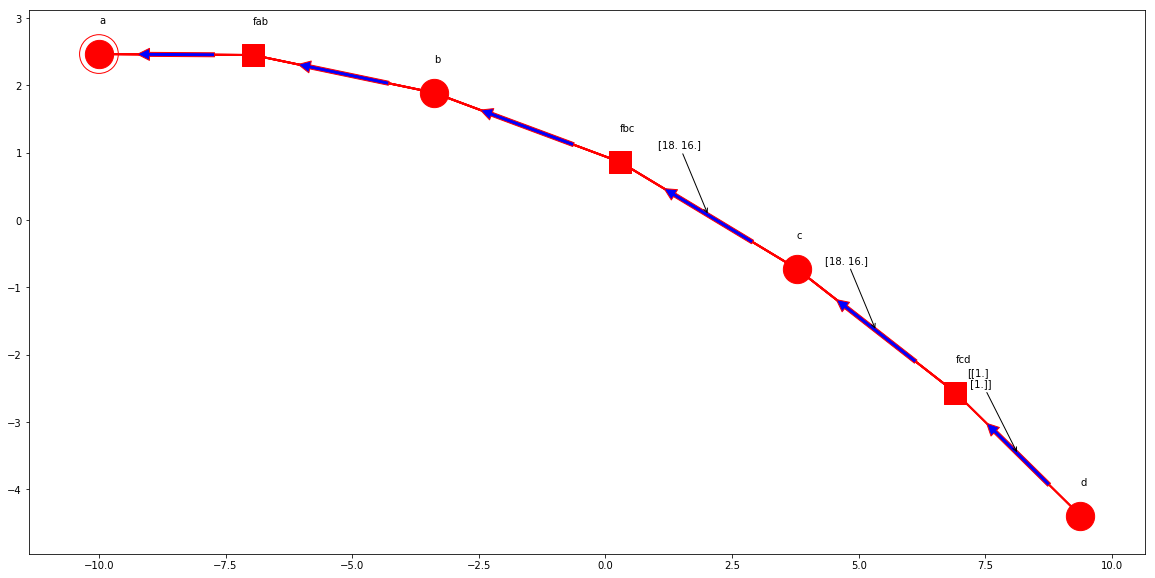

fbc b
[260. 276.]

[(<fglib.nodes.VNode object at 0x000001C3EBB364A8>, <fglib.nodes.FNode object at 0x000001C3EBB36198>, <fglib.rv.Discrete object at 0x000001C3EBB367F0>), (<fglib.nodes.FNode object at 0x000001C3EBB36198>, <fglib.nodes.VNode object at 0x000001C3EBB36EB8>, <fglib.rv.Discrete object at 0x000001C3EB76EF98>), (<fglib.nodes.VNode object at 0x000001C3EBB36EB8>, <fglib.nodes.FNode object at 0x000001C3EBB360F0>, <fglib.rv.Discrete object at 0x000001C3EB25DDD8>), (<fglib.nodes.FNode object at 0x000001C3EBB360F0>, <fglib.nodes.VNode object at 0x000001C3EBB36128>, <fglib.rv.Discrete object at 0x000001C3EA6D3BA8>)]


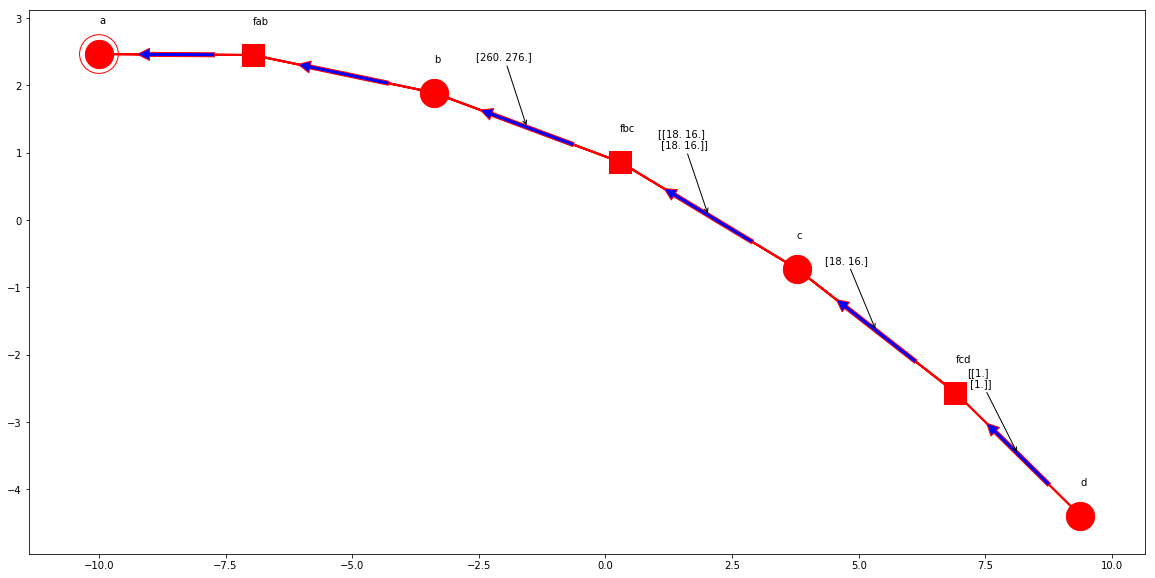

b fab
[260. 276.]

[(<fglib.nodes.VNode object at 0x000001C3EBB364A8>, <fglib.nodes.FNode object at 0x000001C3EBB36198>, <fglib.rv.Discrete object at 0x000001C3EBB367F0>), (<fglib.nodes.FNode object at 0x000001C3EBB36198>, <fglib.nodes.VNode object at 0x000001C3EBB36EB8>, <fglib.rv.Discrete object at 0x000001C3EB76EF98>), (<fglib.nodes.VNode object at 0x000001C3EBB36EB8>, <fglib.nodes.FNode object at 0x000001C3EBB360F0>, <fglib.rv.Discrete object at 0x000001C3EB25DDD8>), (<fglib.nodes.FNode object at 0x000001C3EBB360F0>, <fglib.nodes.VNode object at 0x000001C3EBB36128>, <fglib.rv.Discrete object at 0x000001C3EA6D3BA8>), (<fglib.nodes.VNode object at 0x000001C3EBB36128>, <fglib.nodes.FNode object at 0x000001C3EBB36438>, <fglib.rv.Discrete object at 0x000001C3EB65C320>)]


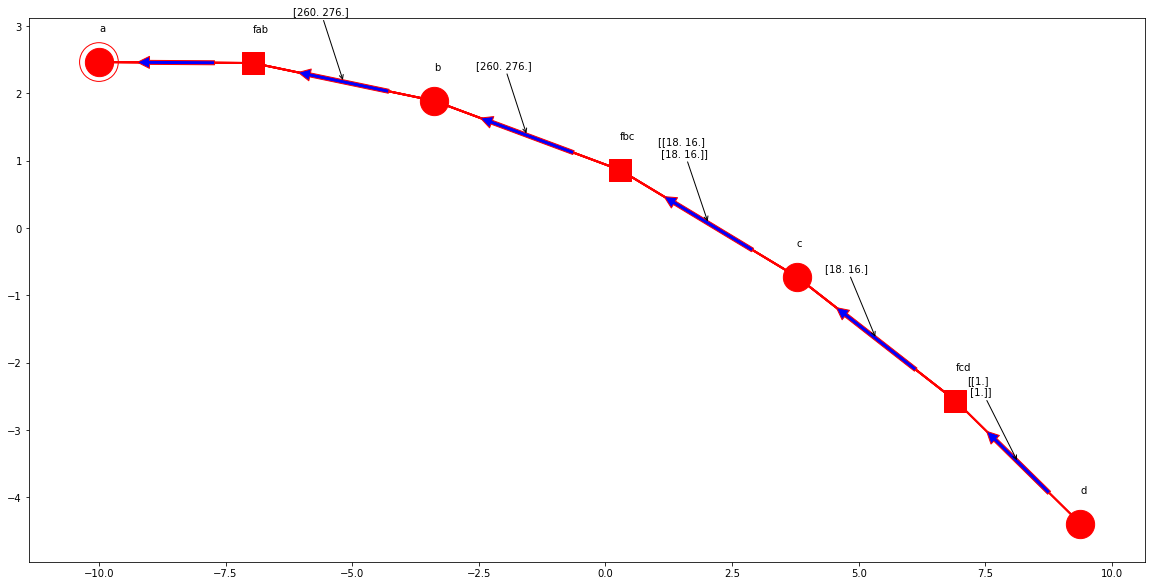

fab a
[27380. 19160.]

[(<fglib.nodes.VNode object at 0x000001C3EBB364A8>, <fglib.nodes.FNode object at 0x000001C3EBB36198>, <fglib.rv.Discrete object at 0x000001C3EBB367F0>), (<fglib.nodes.FNode object at 0x000001C3EBB36198>, <fglib.nodes.VNode object at 0x000001C3EBB36EB8>, <fglib.rv.Discrete object at 0x000001C3EB76EF98>), (<fglib.nodes.VNode object at 0x000001C3EBB36EB8>, <fglib.nodes.FNode object at 0x000001C3EBB360F0>, <fglib.rv.Discrete object at 0x000001C3EB25DDD8>), (<fglib.nodes.FNode object at 0x000001C3EBB360F0>, <fglib.nodes.VNode object at 0x000001C3EBB36128>, <fglib.rv.Discrete object at 0x000001C3EA6D3BA8>), (<fglib.nodes.VNode object at 0x000001C3EBB36128>, <fglib.nodes.FNode object at 0x000001C3EBB36438>, <fglib.rv.Discrete object at 0x000001C3EB65C320>), (<fglib.nodes.FNode object at 0x000001C3EBB36438>, <fglib.nodes.VNode object at 0x000001C3EBB36B70>, <fglib.rv.Discrete object at 0x000001C3EC0D2F60>)]


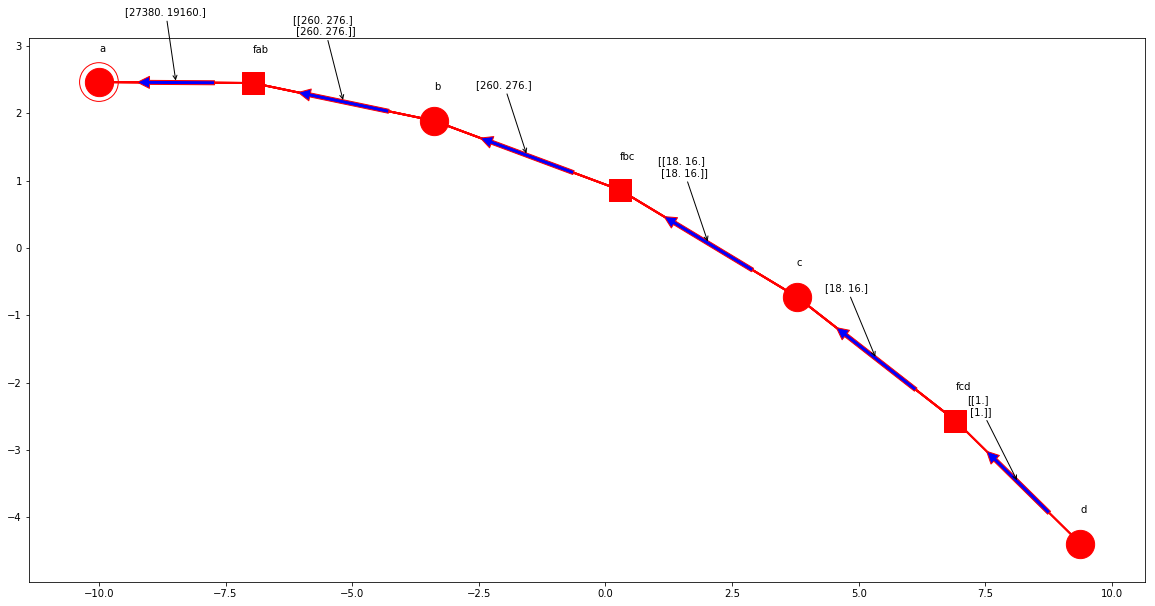

backward
a fab
[[1. 1.]]



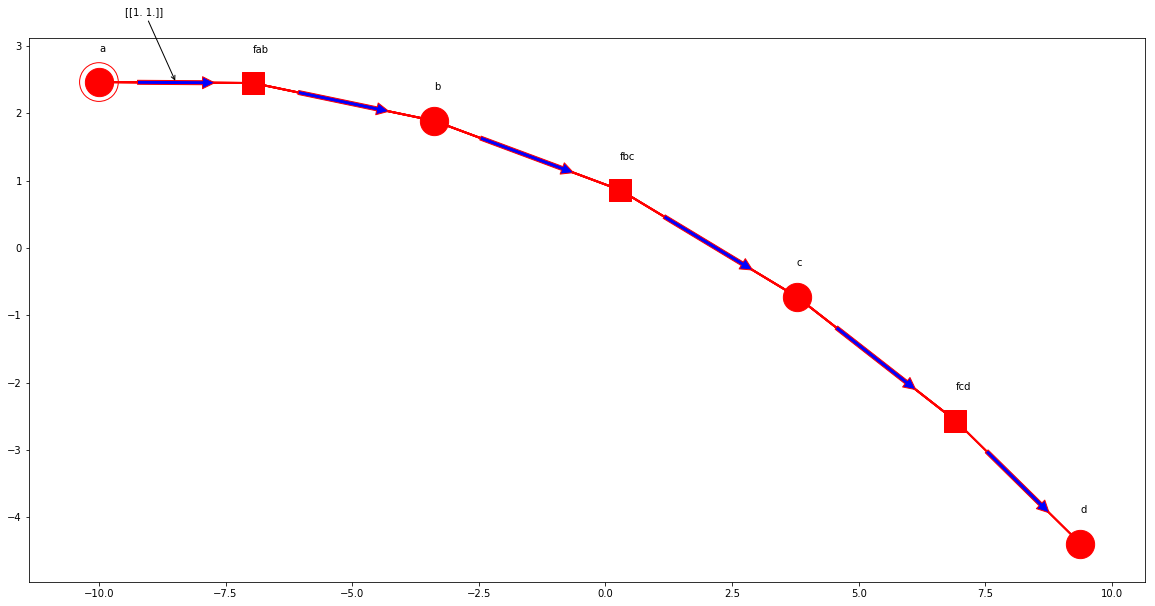

fab b
[110.  65.]



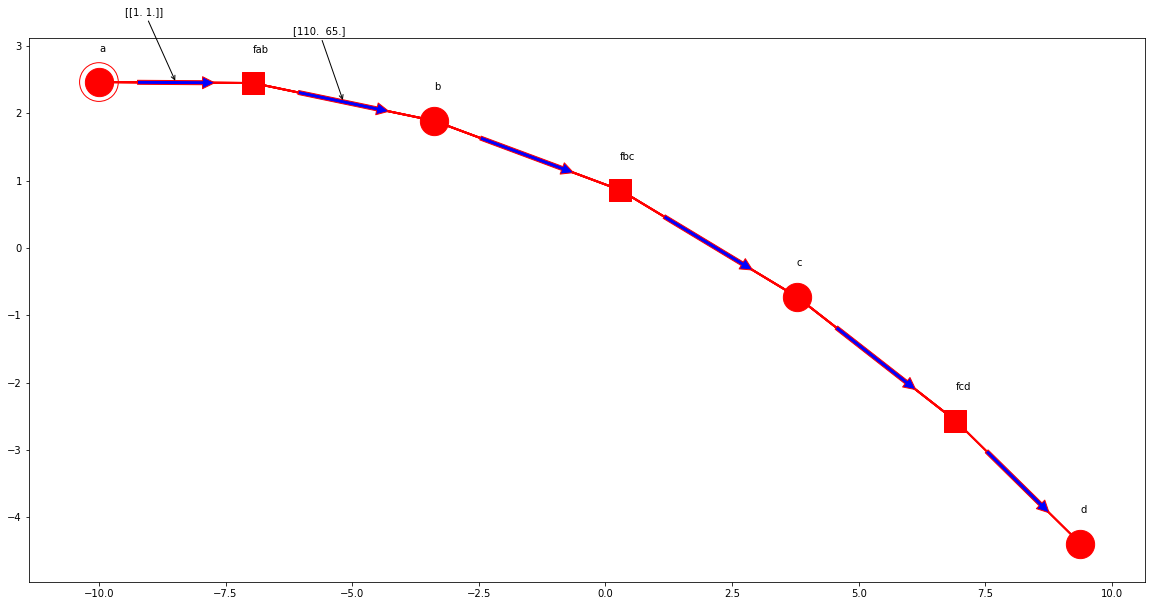

b fbc
[110.  65.]



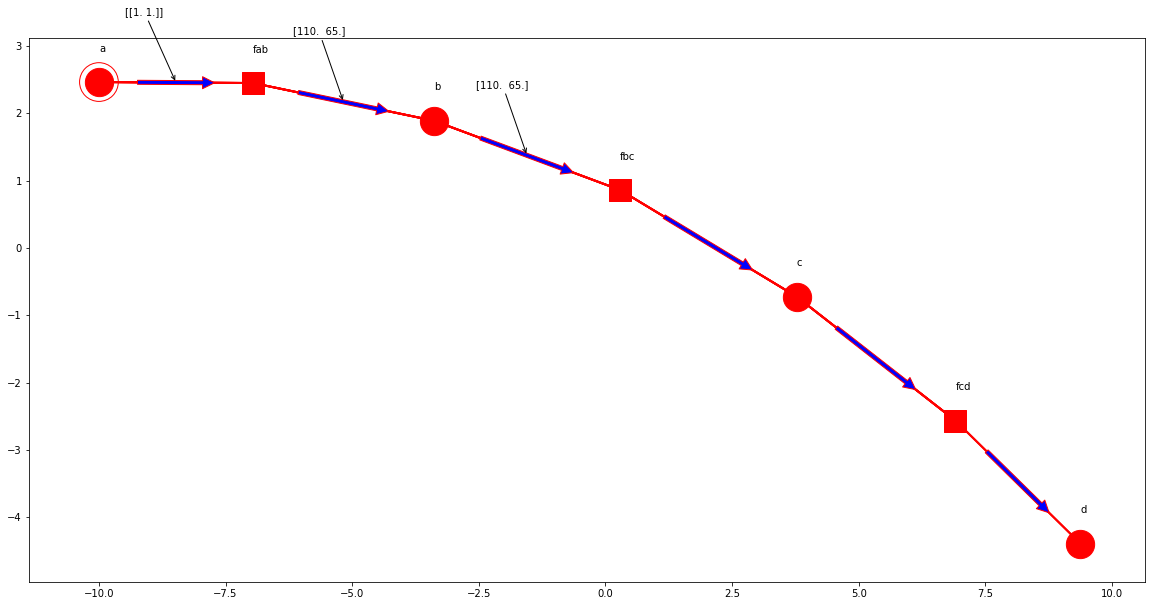

fbc c
[1230. 1525.]



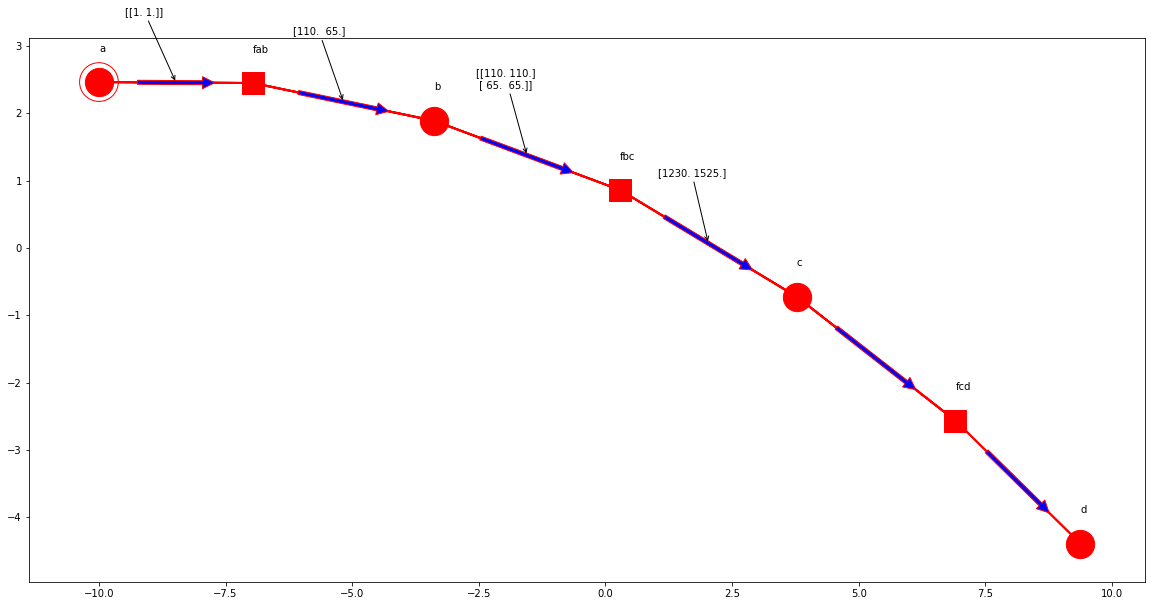

c fcd
[1230. 1525.]



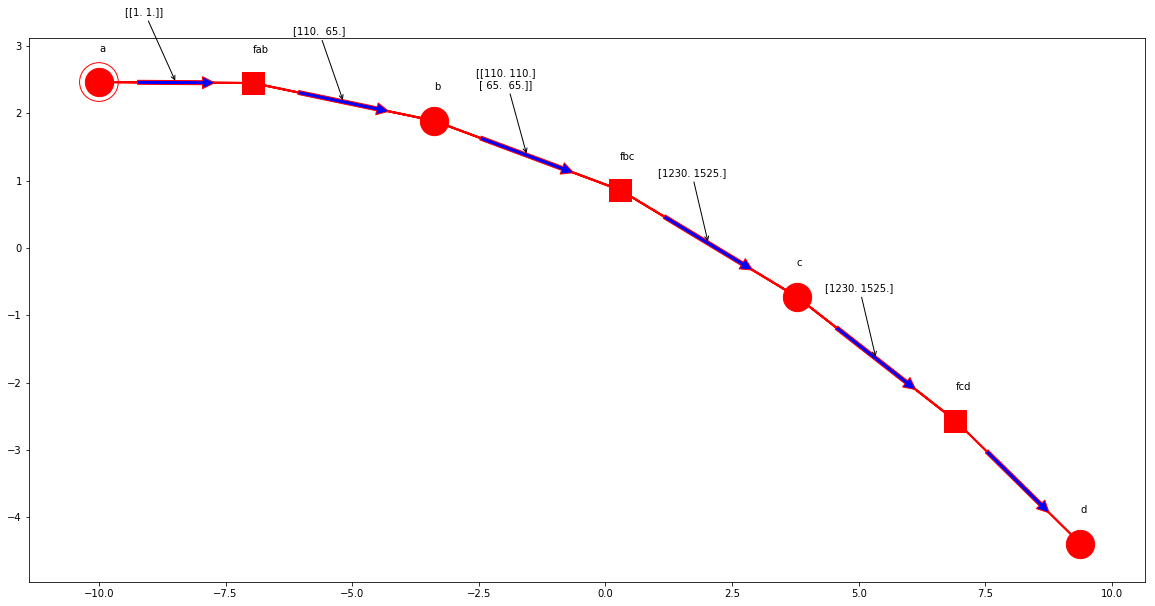

fcd d
[21450. 25090.]



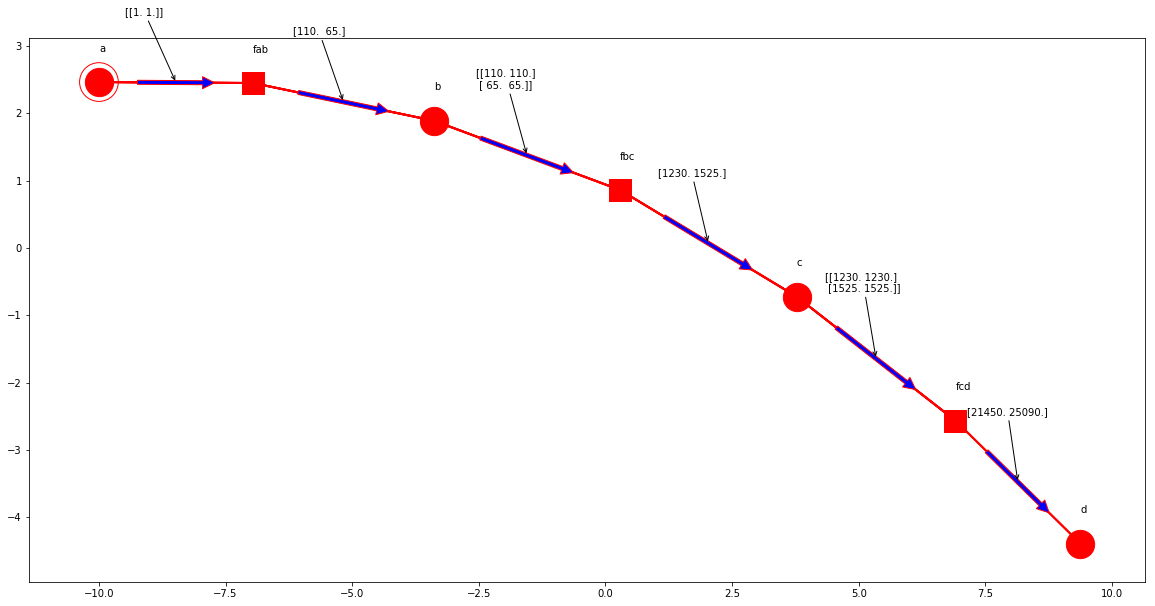

In [143]:
belief_propagation(fg,a)

In [125]:
def max_product(graph, query_node=None):
    """Max-product algorithm.
    Compute setting of variables with maximum probability on graphs
    that are tree structured.
    Return the setting of all query_nodes.
    """
    track = {}  # Setting of variables

    if query_node is None:  # pick random node
        query_node = choice(graph.get_vnodes())

    # Depth First Search to determine edges
    dfs = nx.dfs_edges(graph, query_node)

    # Convert tuple to reversed list
    backward_path = list(dfs)
    forward_path = reversed(backward_path)

    # Messages in forward phase
    print('forward')
    for (v, u) in forward_path:  # Edge direction: u -> v
        msg = u.mpa(v)
        print(u,v)
        print(msg)
        print()
        graph[u][v]['object'].set_message(u, v, msg)

    print('backward')
    # Messages in backward phase
    for (u, v) in backward_path:  # Edge direction: u -> v
        msg = u.mpa(v)
        print(u,v)
        print(msg)
        graph[u][v]['object'].set_message(u, v, msg)

    # Maximum argument for query node
    track[query_node] = query_node.argmax()

    # Back-tracking
    for (u, v) in backward_path:  # Edge direction: u -> v
        if v.type == nodes.NodeType.factor_node:
            for k in v.record[u].keys():  # Iterate over outgoing edges
                track[k] = v.record[u][k]

    # Return maximum probability for query node and setting of variable
    return query_node.maximum(), track



In [144]:
mp = max_product(fg,a)

forward
d fcd
[[1.]
 [1.]]

fcd c
[10. 10.]

c fbc
[10. 10.]

fbc b
[100. 150.]

b fab
[100. 150.]

fab a
[10000.  9000.]

backward
a fab
[[1. 1.]]
fab b
[100.  60.]
b fbc
[100.  60.]
fbc c
[1000.  900.]
c fcd
[1000.  900.]
fcd d
[10000.  9000.]


In [138]:
#first example
#!/usr/bin/env python

"""A simple example of the sum-product algorithm
This is a simple example of the sum-product algorithm on a factor graph
with Bernoulli random variables, which is taken from page 409 of the book
C. M. Bishop, Pattern Recognition and Machine Learning. Springer, 2006.
      /--\      +----+      /--\      +----+      /--\
     | x1 |-----| fa |-----| x2 |-----| fb |-----| x3 |
      \--/      +----+      \--/      +----+      \--/
                             |
                           +----+
                           | fc |
                           +----+
                             |
                            /--\
                           | x4 |
                            \--/
The following joint distributions are used for the factor nodes.
     fa   | x2=0 x2=1     fb   | x3=0 x3=1     fc   | x4=0 x4=1
     ----------------     ----------------     ----------------
     x1=0 | 3  4          x2=0 | 3  4          x2=0 | 7  8
     x1=1 | 3  0          x2=1 | 5  1          x2=1 | 3  9
"""



# Create factor graph
fg = graphs.FactorGraph()

# Create variable nodes
x1 = nodes.VNode("x1", rv.Discrete)
x2 = nodes.VNode("x2", rv.Discrete)
x3 = nodes.VNode("x3", rv.Discrete)
x4 = nodes.VNode("x4", rv.Discrete)

# Create factor nodes (with joint distributions)
dist_fa = [[3, 4],
           [3, 9]]
fa = nodes.FNode("fa", rv.Discrete(dist_fa, x1, x2))

dist_fb = [[3, 4],
           [5, 1]]
fb = nodes.FNode("fb", rv.Discrete(dist_fb, x2, x3))

dist_fc = [[7, 8],
           [3, 9]]
fc = nodes.FNode("fc", rv.Discrete(dist_fc, x2, x4))

# Add nodes to factor graph
fg.set_nodes([x1, x2, x3, x4])
fg.set_nodes([fa, fb, fc])

# Add edges to factor graph
fg.set_edge(x1, fa)
fg.set_edge(fa, x2)
fg.set_edge(x2, fb)
fg.set_edge(fb, x3)
fg.set_edge(x2, fc)
fg.set_edge(fc, x4)


the chosen node
x2

forward
x4 fc
[[1.]
 [1.]]

[(<fglib.nodes.VNode object at 0x000001C3EAE5BE48>, <fglib.nodes.FNode object at 0x000001C3EAE5BBE0>, <fglib.rv.Discrete object at 0x000001C3EAE5BC18>)]


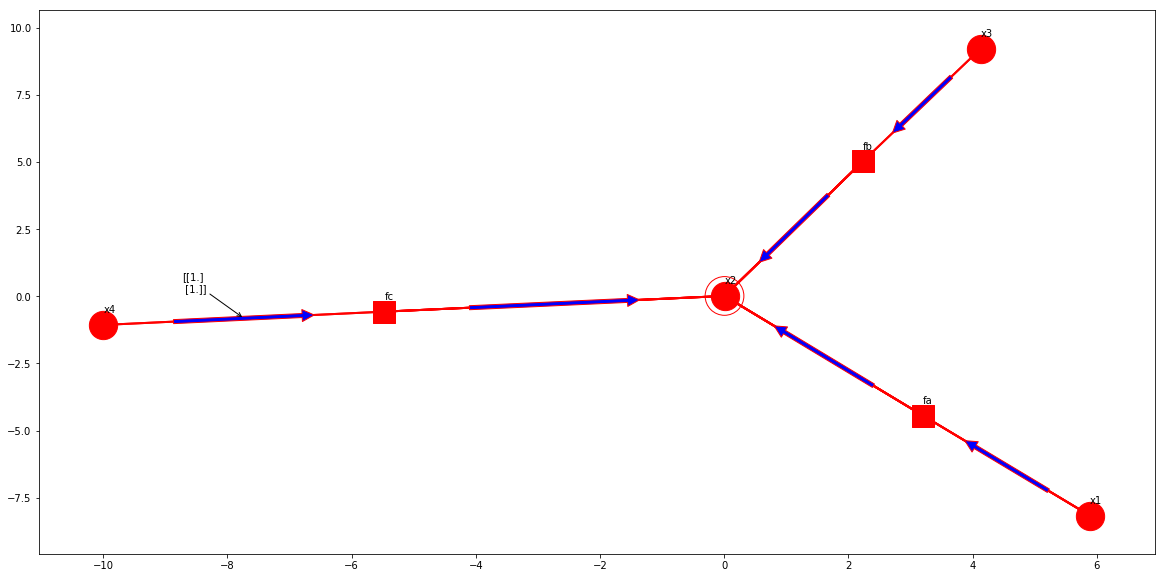

fc x2
[15. 12.]

[(<fglib.nodes.VNode object at 0x000001C3EAE5BE48>, <fglib.nodes.FNode object at 0x000001C3EAE5BBE0>, <fglib.rv.Discrete object at 0x000001C3EAE5BC18>), (<fglib.nodes.FNode object at 0x000001C3EAE5BBE0>, <fglib.nodes.VNode object at 0x000001C3EAE5B048>, <fglib.rv.Discrete object at 0x000001C3EAEE89B0>)]


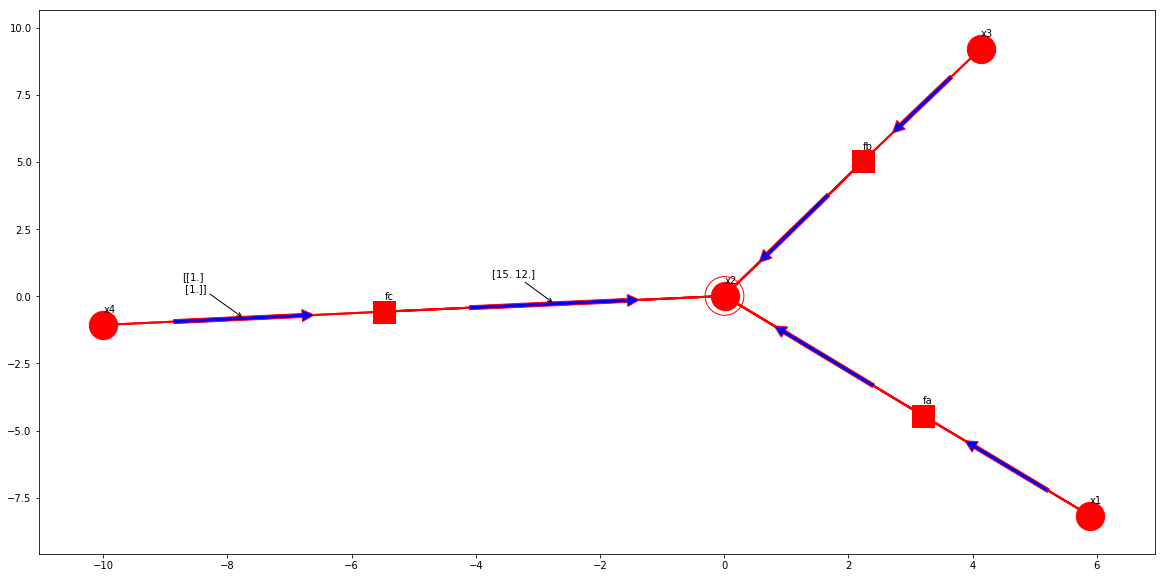

x3 fb
[[1.]
 [1.]]

[(<fglib.nodes.VNode object at 0x000001C3EAE5BE48>, <fglib.nodes.FNode object at 0x000001C3EAE5BBE0>, <fglib.rv.Discrete object at 0x000001C3EAE5BC18>), (<fglib.nodes.FNode object at 0x000001C3EAE5BBE0>, <fglib.nodes.VNode object at 0x000001C3EAE5B048>, <fglib.rv.Discrete object at 0x000001C3EAEE89B0>), (<fglib.nodes.VNode object at 0x000001C3EAE5B358>, <fglib.nodes.FNode object at 0x000001C3EAE5B7B8>, <fglib.rv.Discrete object at 0x000001C3EAE5B9B0>)]


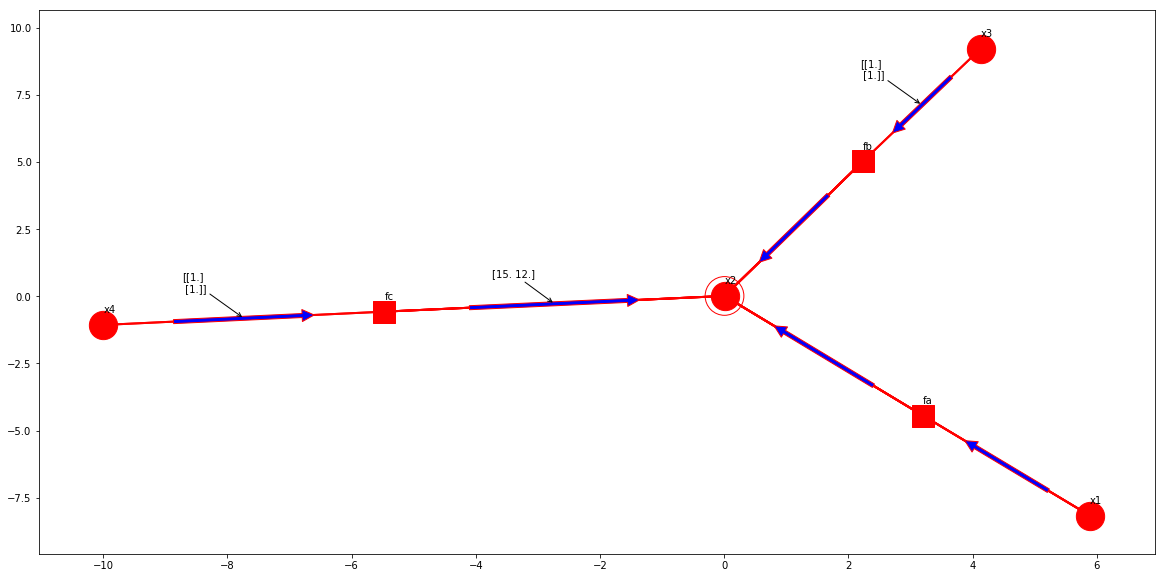

fb x2
[7. 6.]

[(<fglib.nodes.VNode object at 0x000001C3EAE5BE48>, <fglib.nodes.FNode object at 0x000001C3EAE5BBE0>, <fglib.rv.Discrete object at 0x000001C3EAE5BC18>), (<fglib.nodes.FNode object at 0x000001C3EAE5BBE0>, <fglib.nodes.VNode object at 0x000001C3EAE5B048>, <fglib.rv.Discrete object at 0x000001C3EAEE89B0>), (<fglib.nodes.VNode object at 0x000001C3EAE5B358>, <fglib.nodes.FNode object at 0x000001C3EAE5B7B8>, <fglib.rv.Discrete object at 0x000001C3EAE5B9B0>), (<fglib.nodes.FNode object at 0x000001C3EAE5B7B8>, <fglib.nodes.VNode object at 0x000001C3EAE5B048>, <fglib.rv.Discrete object at 0x000001C3EB2A39B0>)]


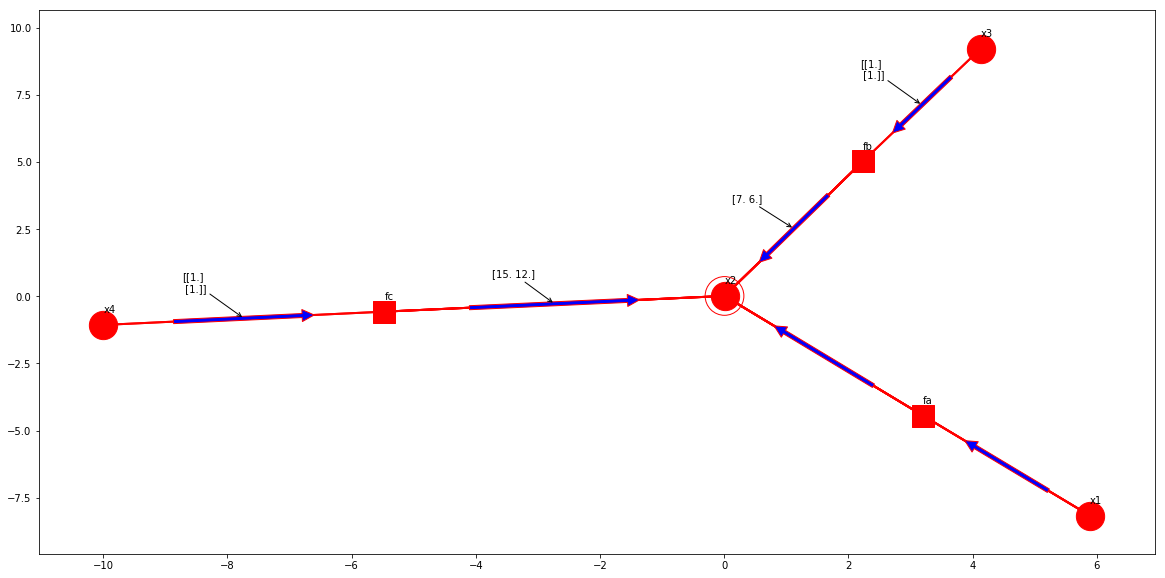

x1 fa
[[1. 1.]]

[(<fglib.nodes.VNode object at 0x000001C3EAE5BE48>, <fglib.nodes.FNode object at 0x000001C3EAE5BBE0>, <fglib.rv.Discrete object at 0x000001C3EAE5BC18>), (<fglib.nodes.FNode object at 0x000001C3EAE5BBE0>, <fglib.nodes.VNode object at 0x000001C3EAE5B048>, <fglib.rv.Discrete object at 0x000001C3EAEE89B0>), (<fglib.nodes.VNode object at 0x000001C3EAE5B358>, <fglib.nodes.FNode object at 0x000001C3EAE5B7B8>, <fglib.rv.Discrete object at 0x000001C3EAE5B9B0>), (<fglib.nodes.FNode object at 0x000001C3EAE5B7B8>, <fglib.nodes.VNode object at 0x000001C3EAE5B048>, <fglib.rv.Discrete object at 0x000001C3EB2A39B0>), (<fglib.nodes.VNode object at 0x000001C3EAE5BDD8>, <fglib.nodes.FNode object at 0x000001C3EAE5B7F0>, <fglib.rv.Discrete object at 0x000001C3EAE5BB38>)]


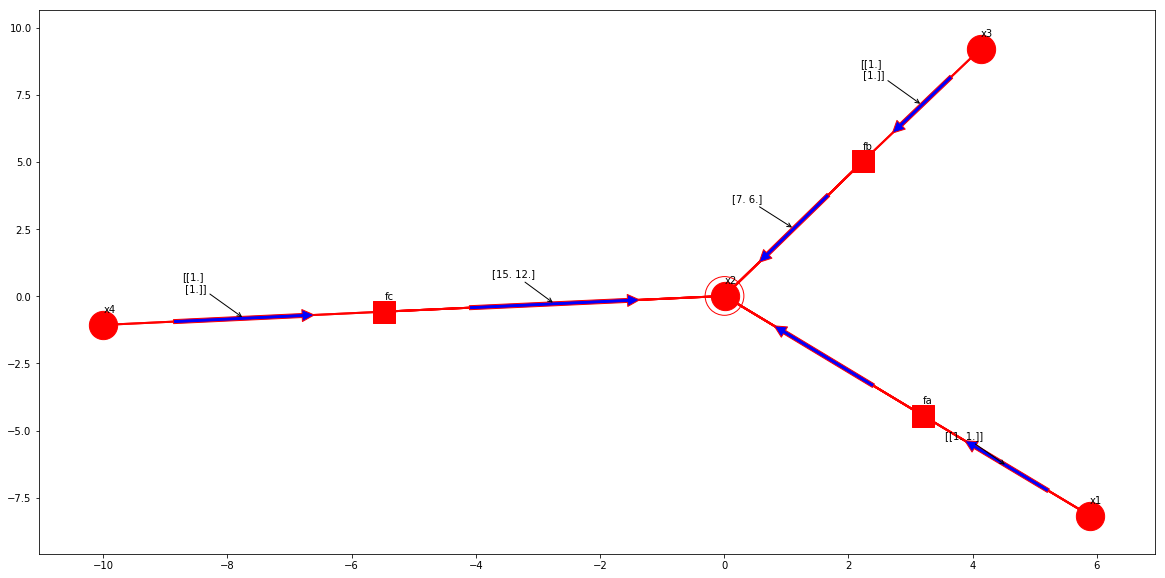

fa x2
[6. 4.]

[(<fglib.nodes.VNode object at 0x000001C3EAE5BE48>, <fglib.nodes.FNode object at 0x000001C3EAE5BBE0>, <fglib.rv.Discrete object at 0x000001C3EAE5BC18>), (<fglib.nodes.FNode object at 0x000001C3EAE5BBE0>, <fglib.nodes.VNode object at 0x000001C3EAE5B048>, <fglib.rv.Discrete object at 0x000001C3EAEE89B0>), (<fglib.nodes.VNode object at 0x000001C3EAE5B358>, <fglib.nodes.FNode object at 0x000001C3EAE5B7B8>, <fglib.rv.Discrete object at 0x000001C3EAE5B9B0>), (<fglib.nodes.FNode object at 0x000001C3EAE5B7B8>, <fglib.nodes.VNode object at 0x000001C3EAE5B048>, <fglib.rv.Discrete object at 0x000001C3EB2A39B0>), (<fglib.nodes.VNode object at 0x000001C3EAE5BDD8>, <fglib.nodes.FNode object at 0x000001C3EAE5B7F0>, <fglib.rv.Discrete object at 0x000001C3EAE5BB38>), (<fglib.nodes.FNode object at 0x000001C3EAE5B7F0>, <fglib.nodes.VNode object at 0x000001C3EAE5B048>, <fglib.rv.Discrete object at 0x000001C3EAE229B0>)]


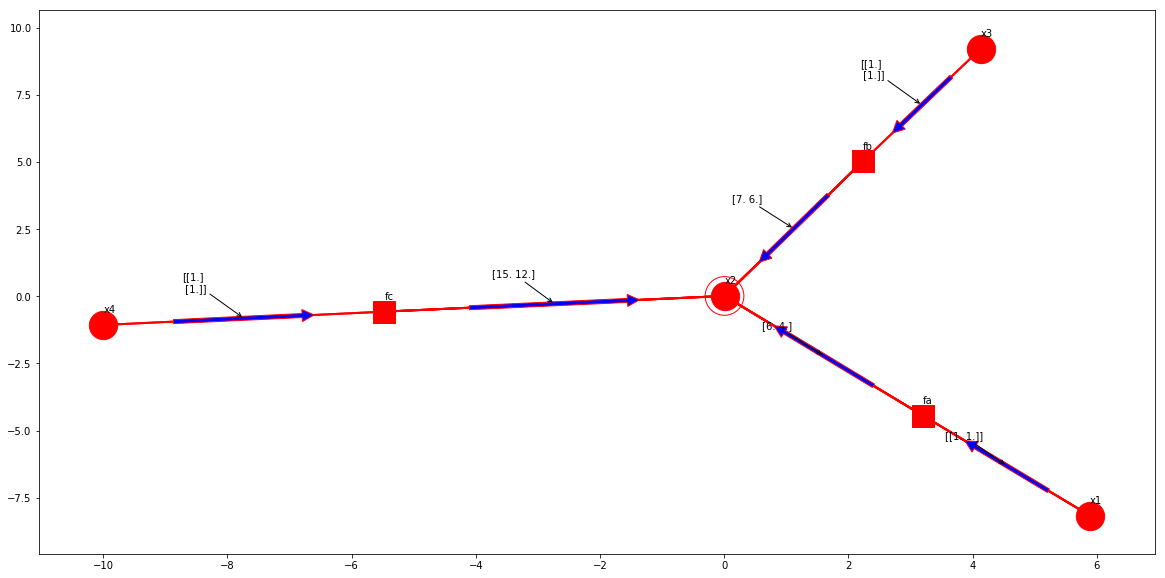

backward
x2 fa
[105.  72.]



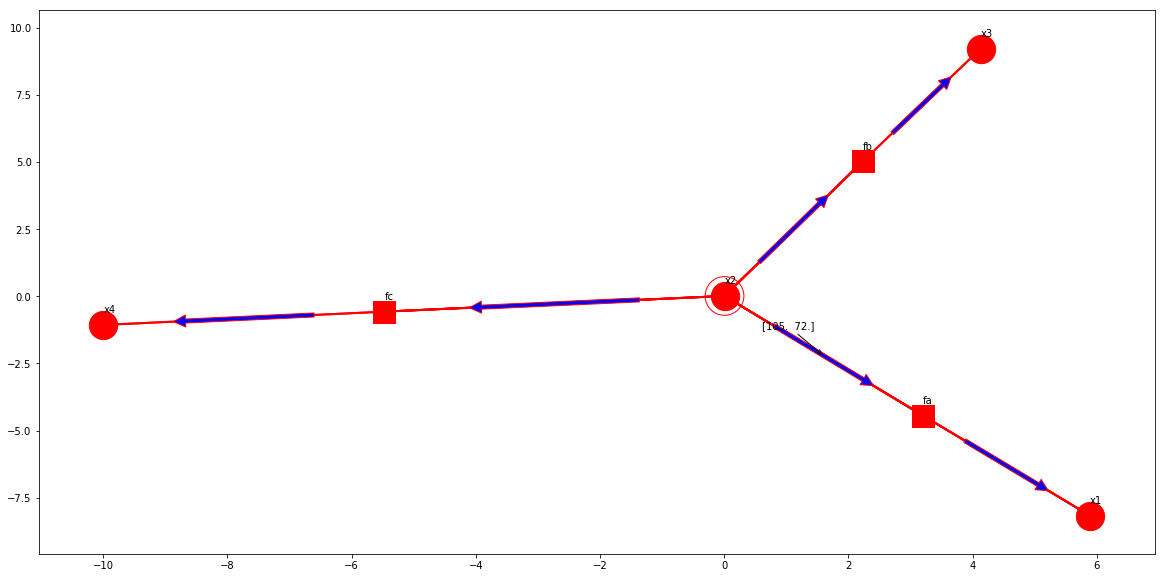

fa x1
[603. 315.]



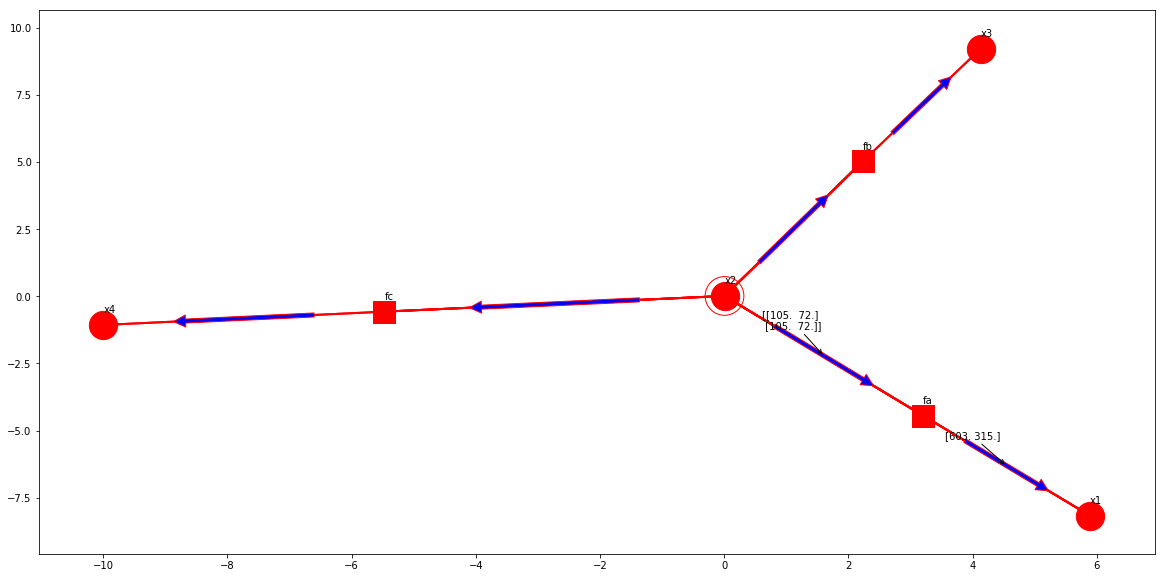

x2 fb
[90. 48.]



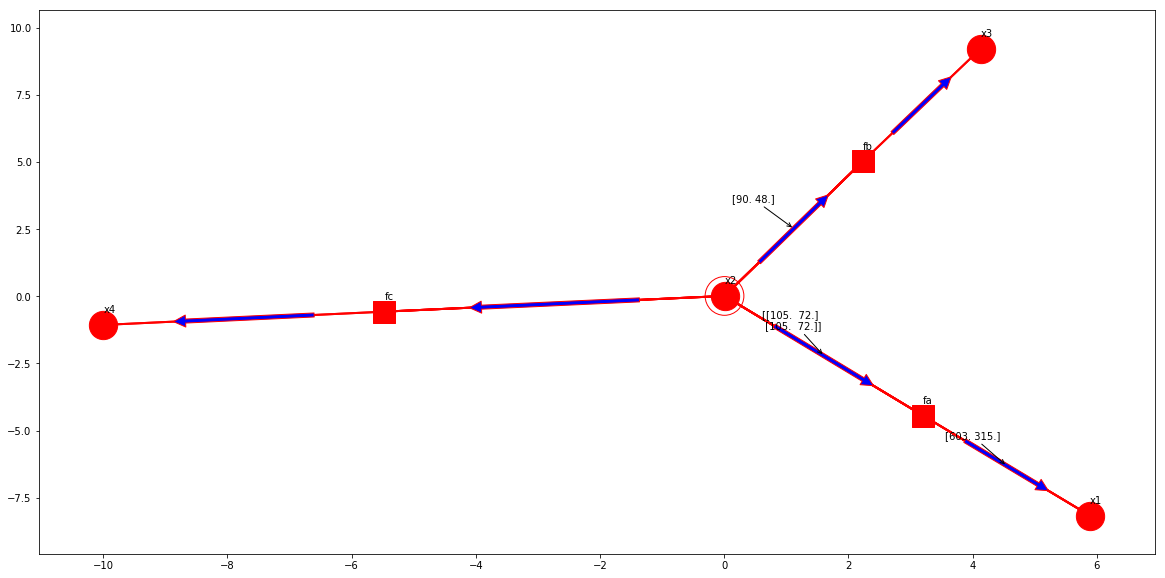

fb x3
[510. 408.]



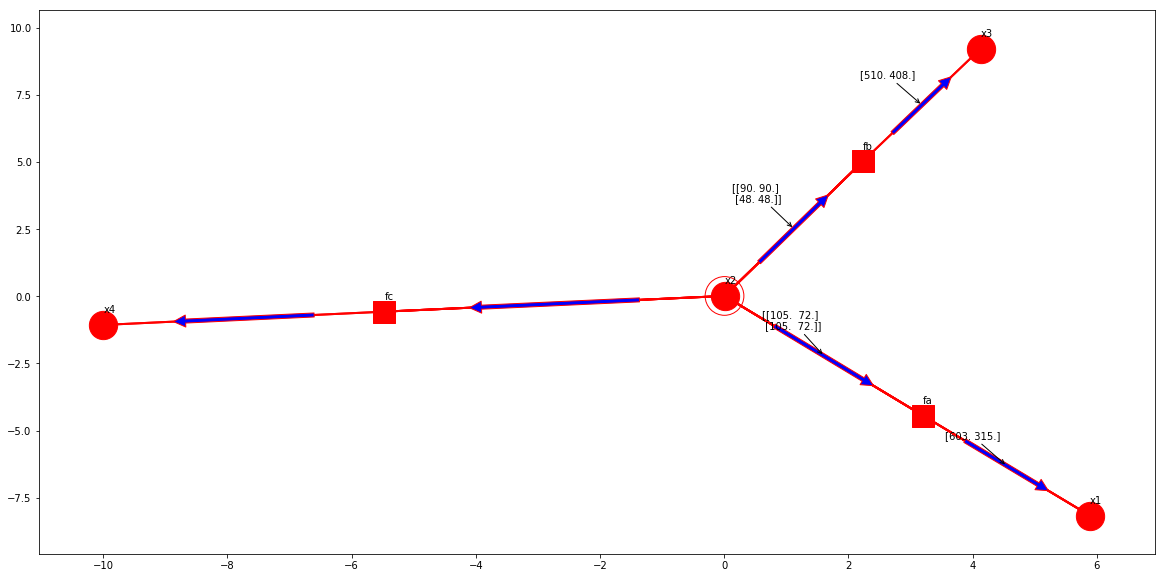

x2 fc
[42. 24.]



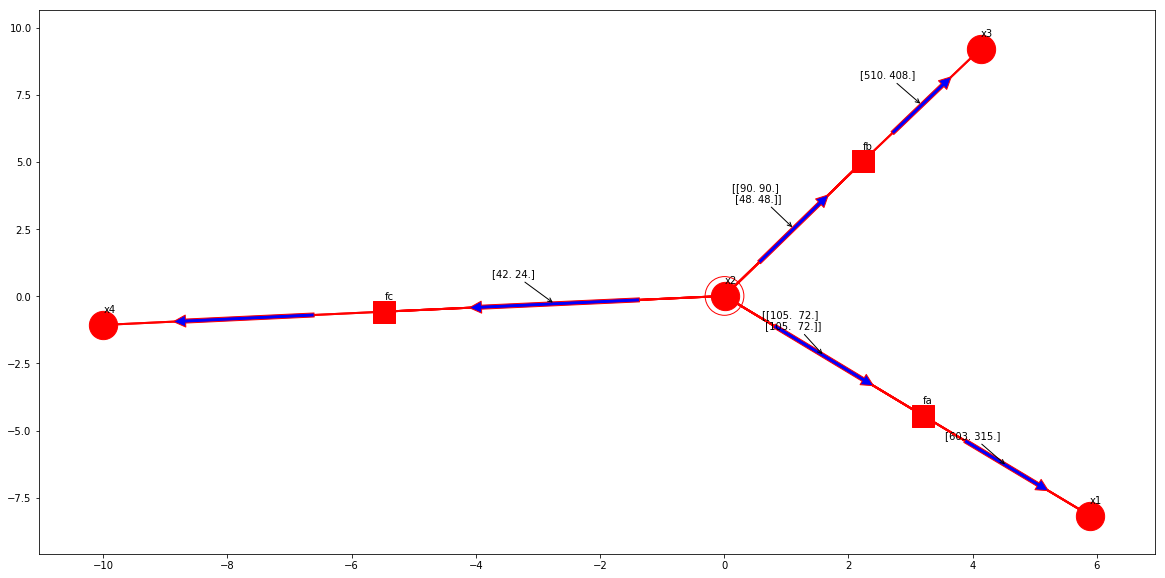

fc x4
[366. 552.]



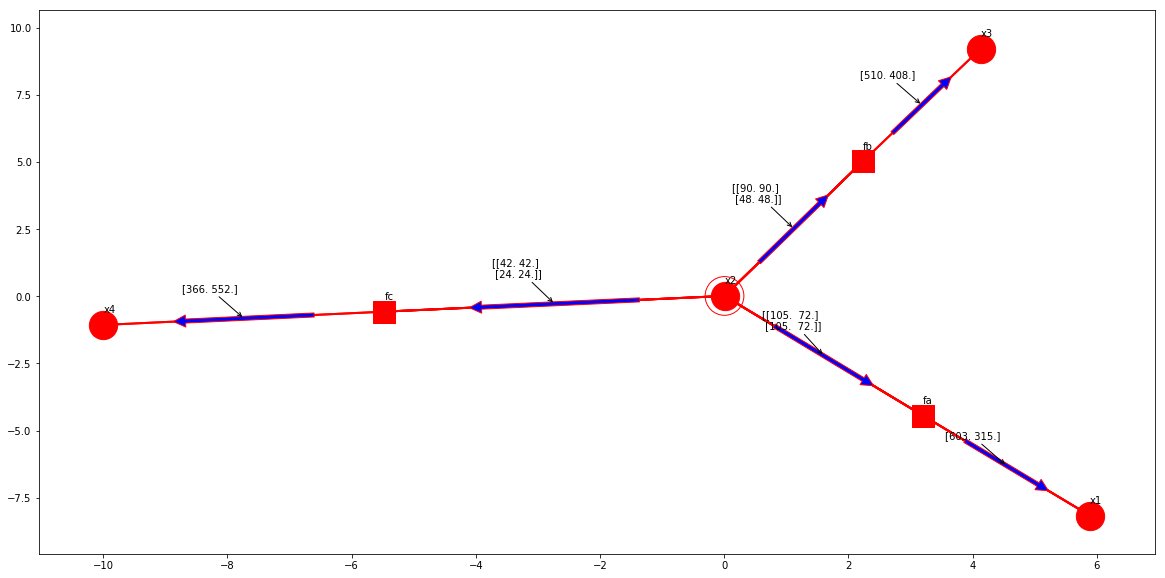

In [135]:
belief_propagation(fg,x2)

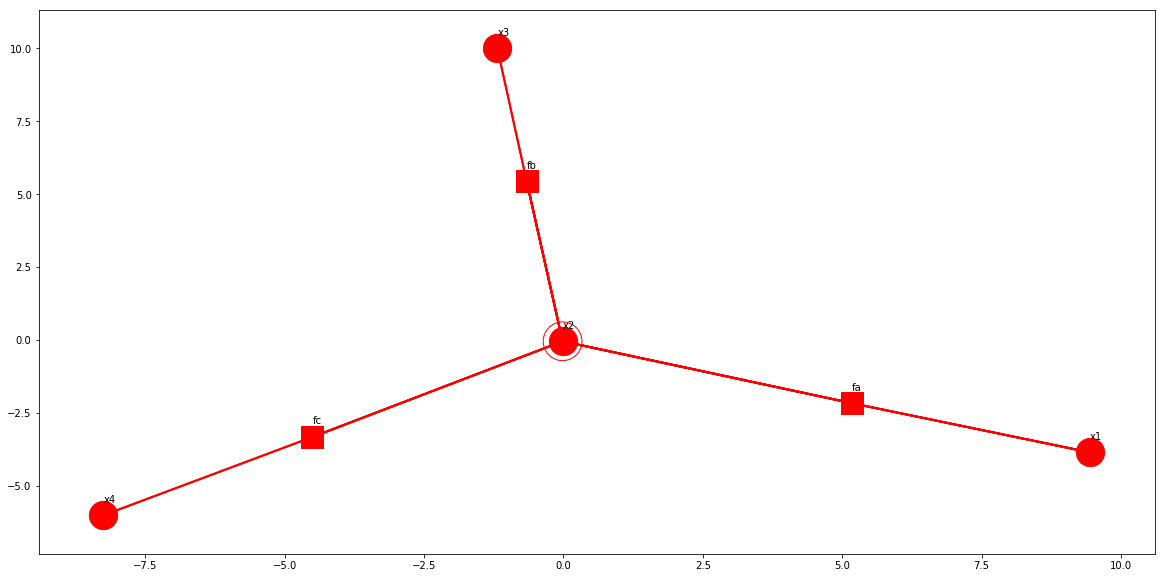

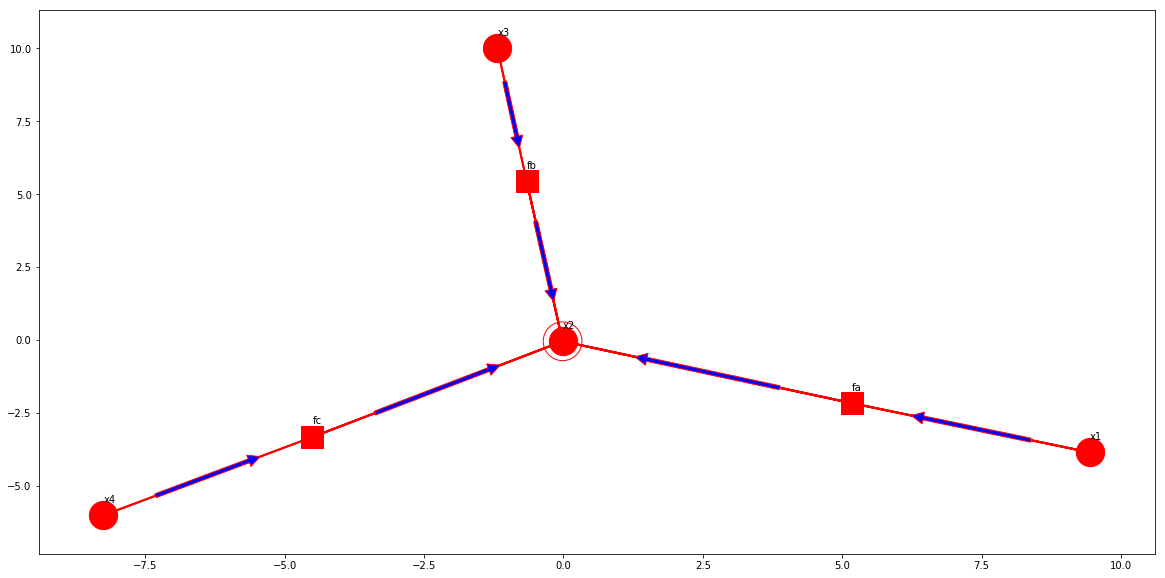

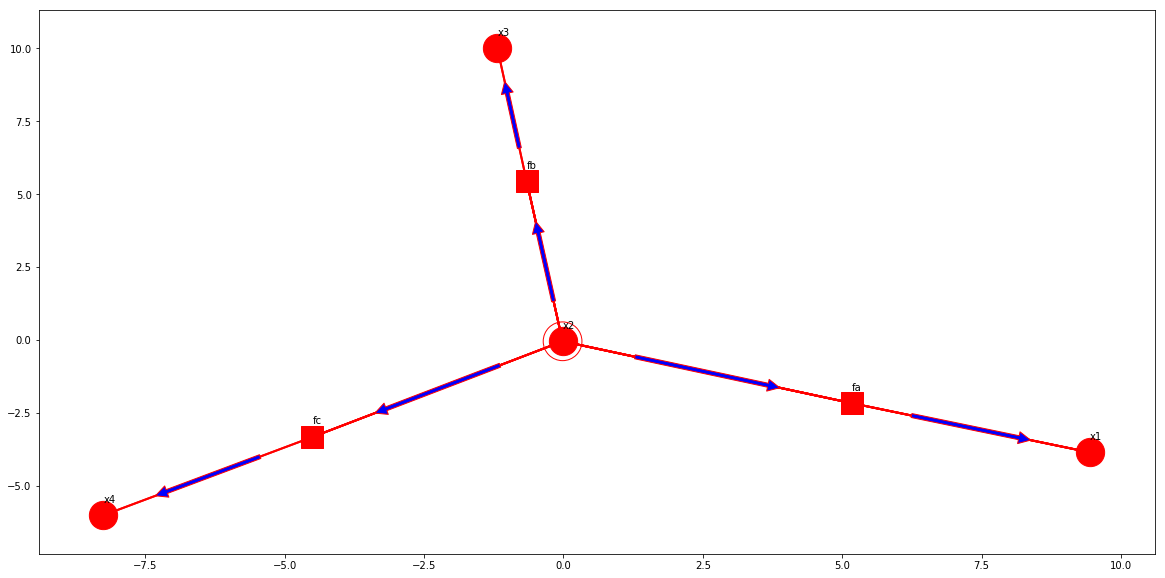

In [70]:
pos = nx.spring_layout(fg,scale=10)
drawgraphWithMessage(fg,chosen_node=x2,pos=pos)
dfs = list(nx.dfs_edges(fg, x2))
drawgraphWithMessage(fg,pos=pos,chosen_node=x2,flow_direction=dfs)
drawgraphWithMessage(fg,pos=pos,chosen_node=x2,flow_direction=dfs,backward=True)

In [139]:
max_product(fg,x2)

forward
x4 fc
[1.]

fc x2
[8. 9.]

x3 fb
[1.]

fb x2
[4. 5.]

x1 fa
[1.]

fa x2
[3. 9.]

backward
x2 fa
[32. 45.]
fa x1
[180. 405.]
x2 fb
[24. 81.]
fb x3
[405.  96.]
x2 fc
[12. 45.]
fc x4
[135. 405.]


(0.8083832335329342,
 {<fglib.nodes.VNode at 0x1c3eb649908>: 0,
  <fglib.nodes.VNode at 0x1c3eb6499b0>: 1,
  <fglib.nodes.VNode at 0x1c3ea640c88>: 0,
  <fglib.nodes.VNode at 0x1c3ea6408d0>: 0})

In [137]:
"""C. M. Bishop, Pattern Recognition and Machine Learning. Springer, 2006.
      /--\      +----+      /--\      +----+      /--\
     | x1 |-----| fa |-----| x2 |-----| fb |-----| x3 |
      \--/      +----+      \--/      +----+      \--/
                             |
                           +----+
                           | fc |
                           +----+
                             |
                            /--\
                           | x4 |
                            \--/
The following joint distributions are used for the factor nodes.
     fa   | x2=0 x2=1     fb   | x3=0 x3=1     fc   | x4=0 x4=1
     ----------------     ----------------     ----------------
     x1=0 | 3  4          x2=0 | 3  4          x2=0 | 7  8
     x1=1 | 3  0          x2=1 | 5  1          x2=1 | 3  9
"""

'C. M. Bishop, Pattern Recognition and Machine Learning. Springer, 2006.\n      /--\\      +----+      /--\\      +----+      /--     | x1 |-----| fa |-----| x2 |-----| fb |-----| x3 |\n      \\--/      +----+      \\--/      +----+      \\--/\n                             |\n                           +----+\n                           | fc |\n                           +----+\n                             |\n                            /--                           | x4 |\n                            \\--/\nThe following joint distributions are used for the factor nodes.\n     fa   | x2=0 x2=1     fb   | x3=0 x3=1     fc   | x4=0 x4=1\n     ----------------     ----------------     ----------------\n     x1=0 | 3  4          x2=0 | 3  4          x2=0 | 7  8\n     x1=1 | 3  0          x2=1 | 5  1          x2=1 | 3  9\n'